## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_results = mouse_metadata.merge(study_results)

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = mouse_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
summary_stats = summary_stats[['mean', 'std', '50%']]
summary_stats['Variance'] = (summary_stats['std'])**2
summary_stats['SEM'] = mouse_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_stats = summary_stats.rename(columns={'mean':'Mean', 'std': 'Std Dev', '50%': 'Median'})
summary_stats

,Mean,Std Dev,Median,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.322552,6.507770,50.854632,42.351070,0.512884
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


## Bar plots

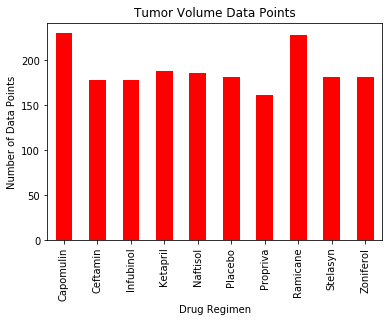

In [40]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_counts = mouse_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
#color = ['r', 'b', 'g', 'y', 'k', 'r', 'b', 'm', 'c', 'w']

summary_plot = grouped_counts.plot(kind='bar', color = 'r')
summary_plot.set_title("Tumor Volume Data Points")
summary_plot.set_ylabel("Number of Data Points")
plt.show()

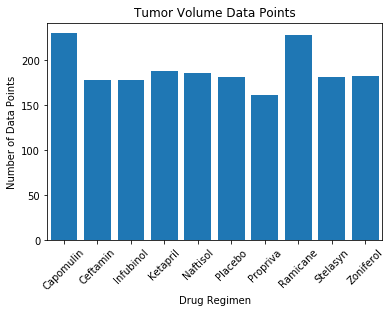

In [77]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(0,len(summary_stats))
xticks = [x for x in grouped_counts.keys()]
plt.bar(x_axis, grouped_counts)
plt.xlim(-0.5 ,x_axis.max() + 0.5)
plt.xticks(x_axis, xticks, rotation='45')
plt.title("Tumor Volume Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

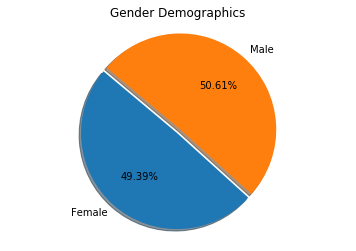

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_demo = mouse_results.groupby('Sex')['Sex'].count()
explode = (0.05,0)
labels = gender_demo.keys()
pie_plot = gender_demo.plot(kind='pie', explode= explode, shadow=True, 
                            labels = labels, autopct = "%1.2f%%", 
                            startangle = 140)
pie_plot.axis('equal')
pie_plot.set_title('Gender Demographics')
pie_plot.set_ylabel('')
#plt.axis('equal')
plt.show()

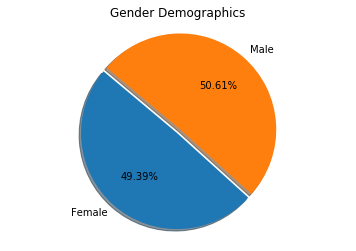

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_demo, explode= explode, shadow=True, 
        labels = labels, autopct = "%1.2f%%", startangle = 140)
plt.title('Gender Demographics')
plt.axis('equal')
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen